In [1]:
import numpy as np
from scipy.spatial.distance import cdist, pdist

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
N = 12

with open('test_0.npy','rb') as f:
    res = np.load(f)
    keys = res.files
    out = {}
    for k in keys:
        out[k] = res[k]/N
        
for i in range(1,N):
    with open('test_%d.npy' % (i*1),'rb') as f:
        res = np.load(f)
        for k in keys:
            out[k] += res[k]/N

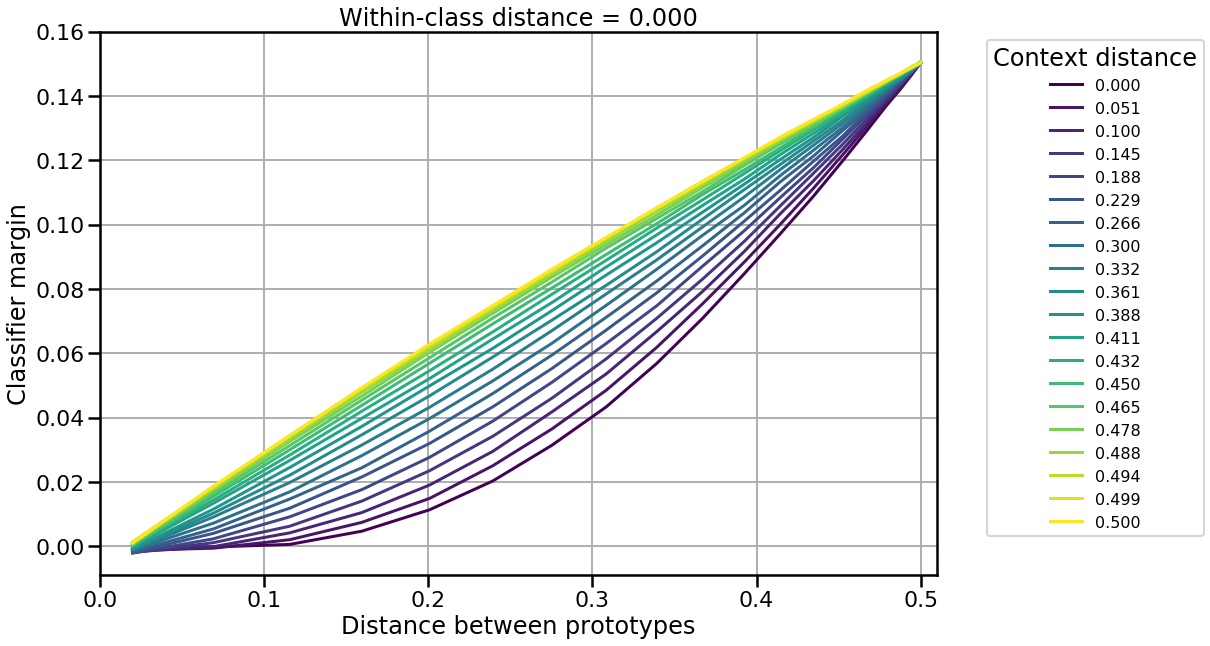

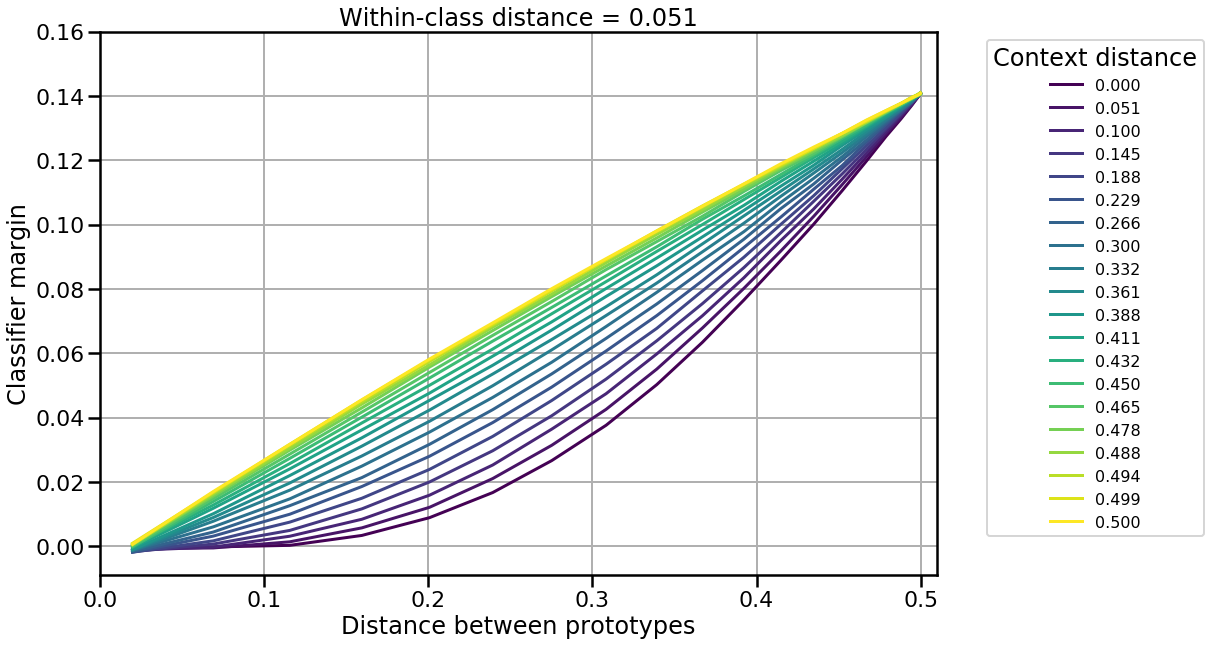

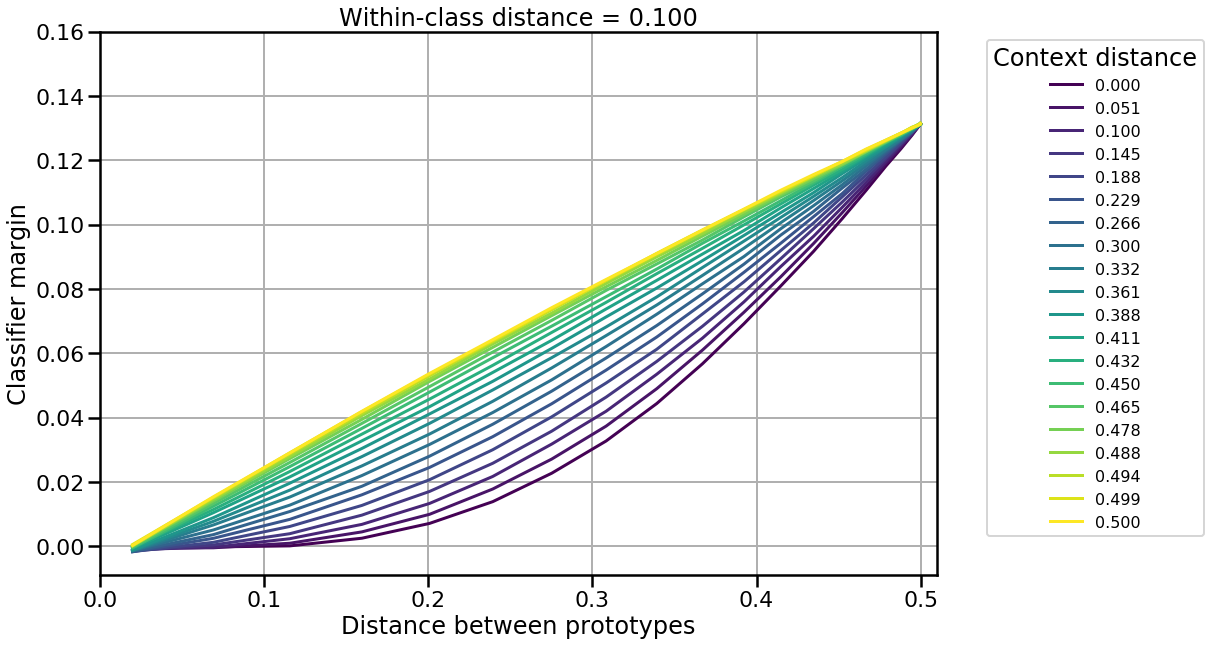

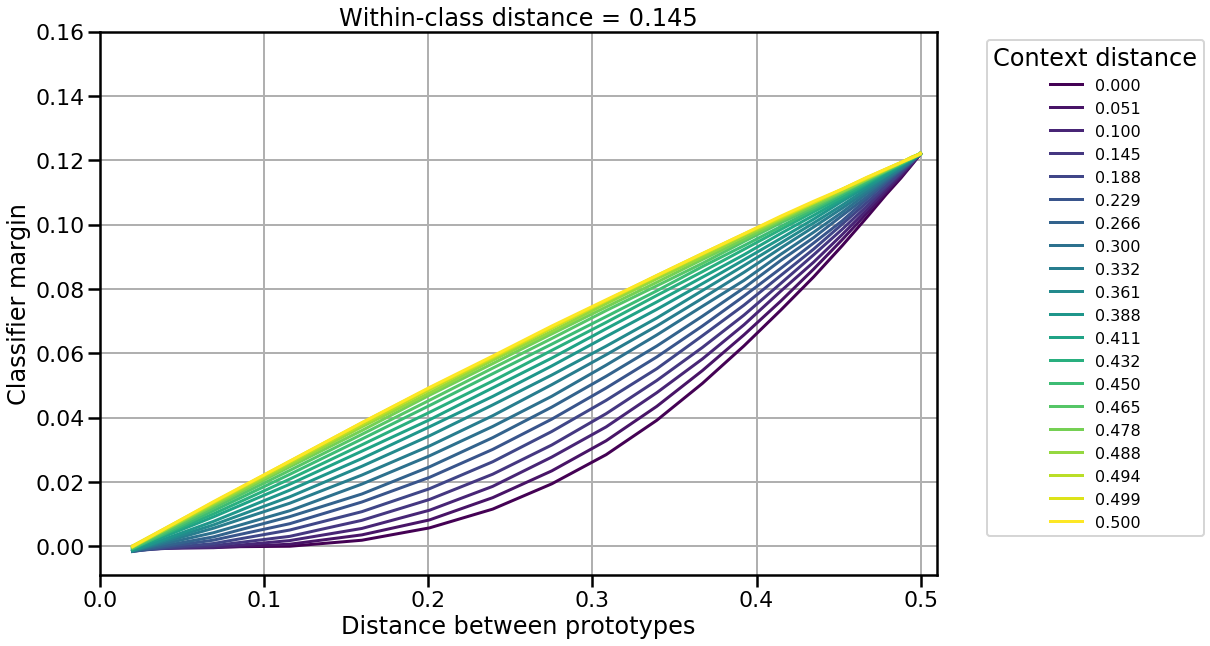

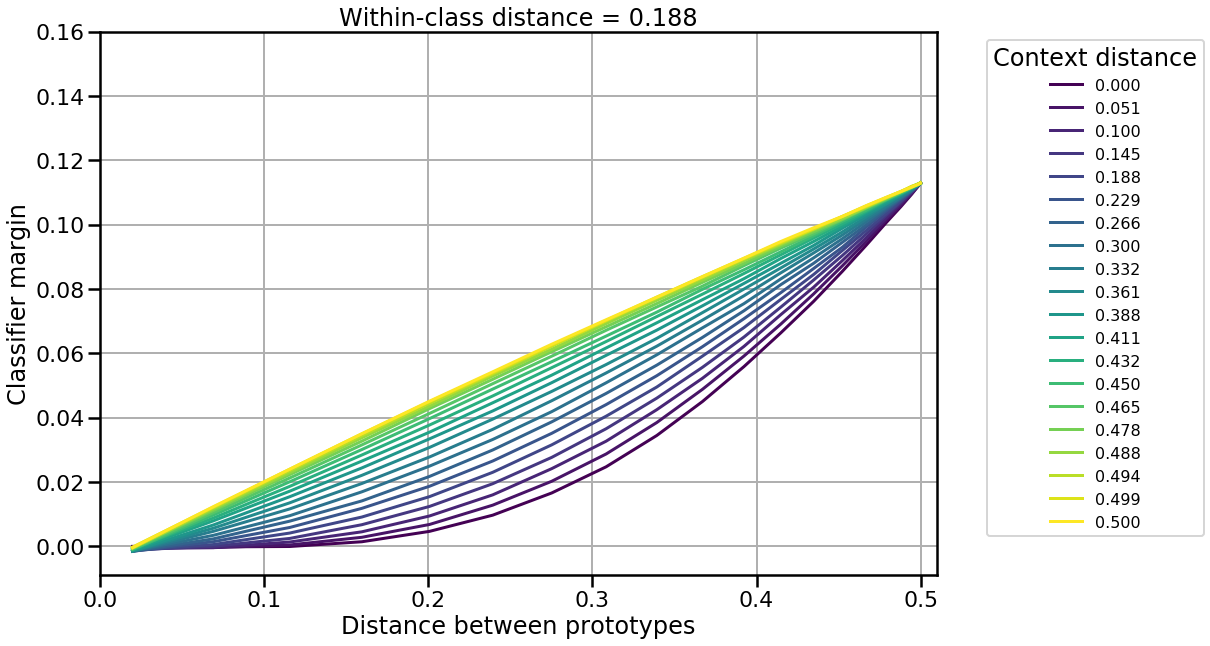

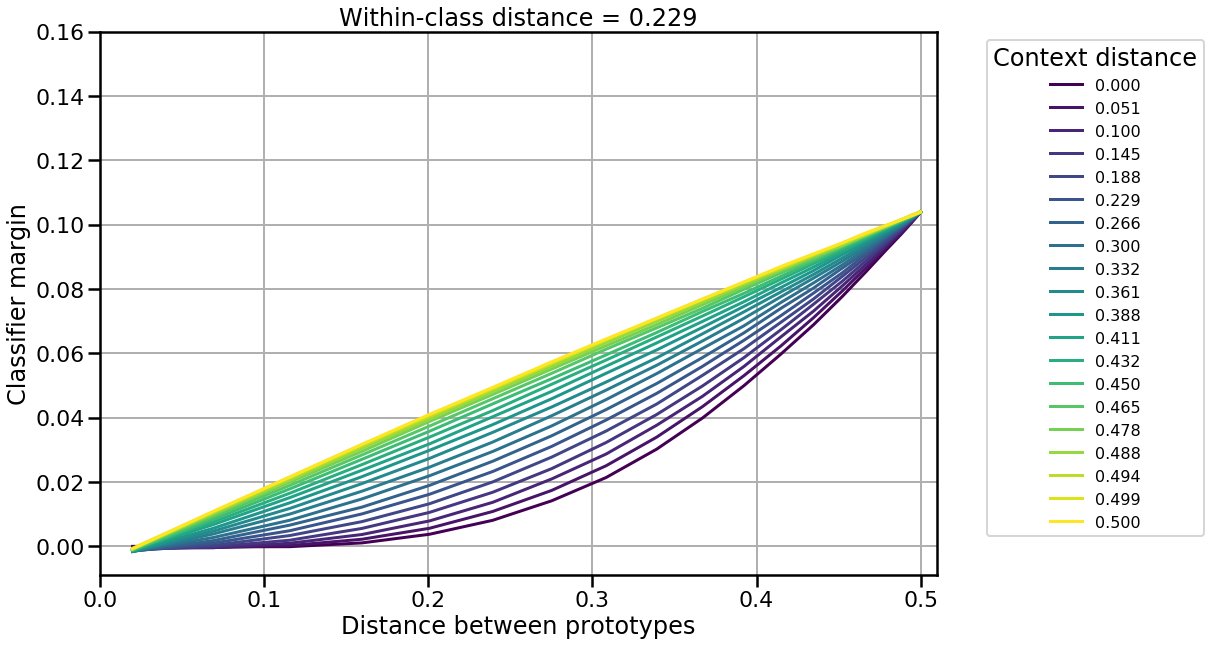

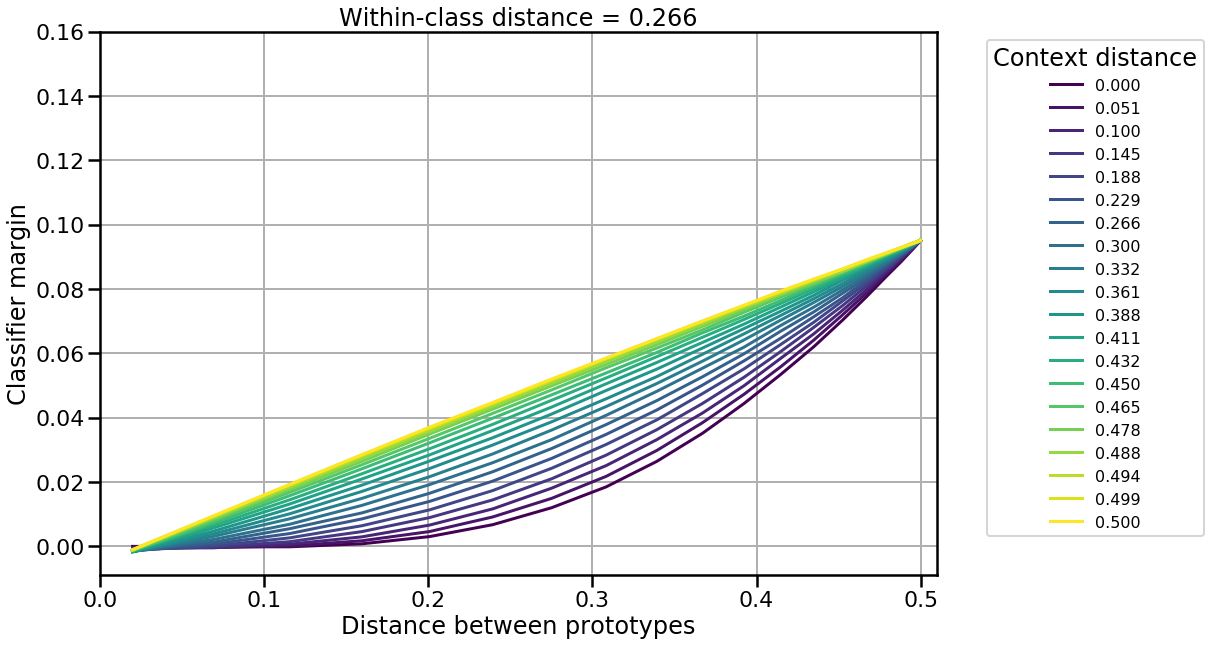

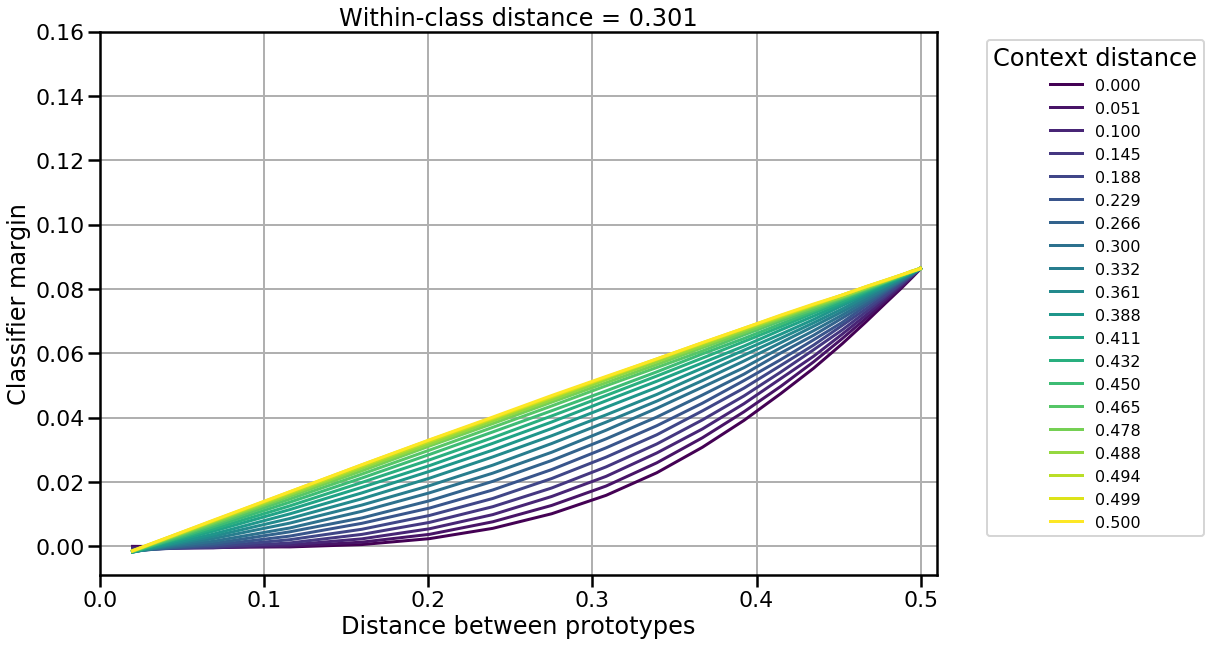

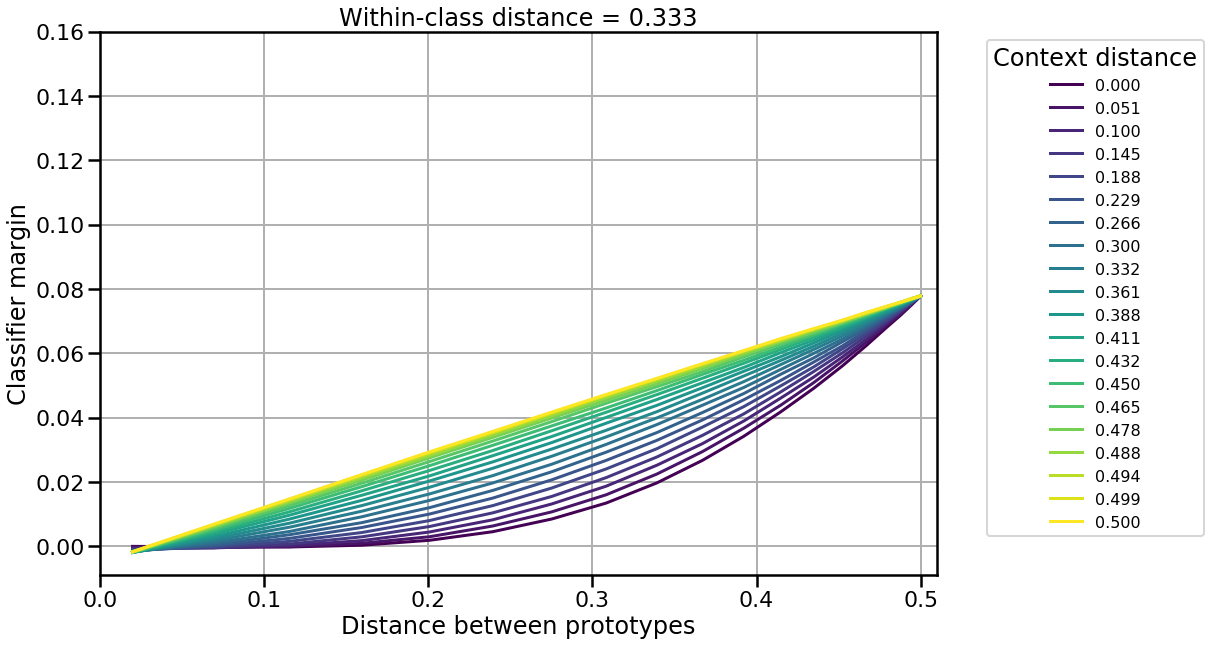

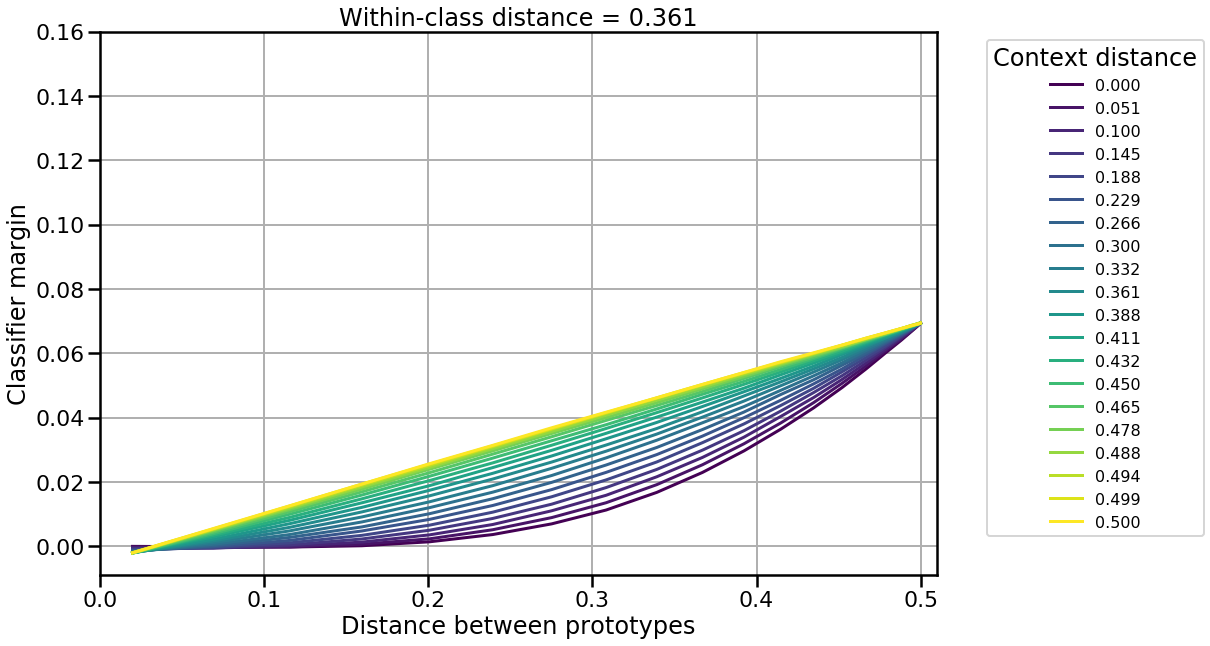

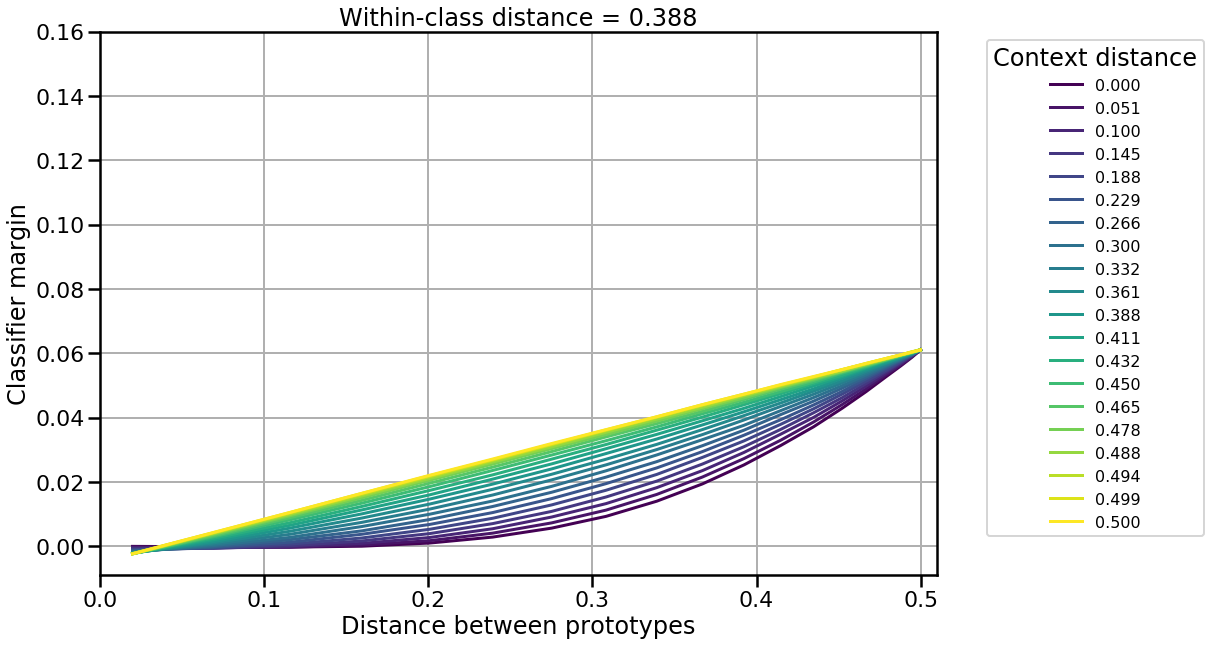

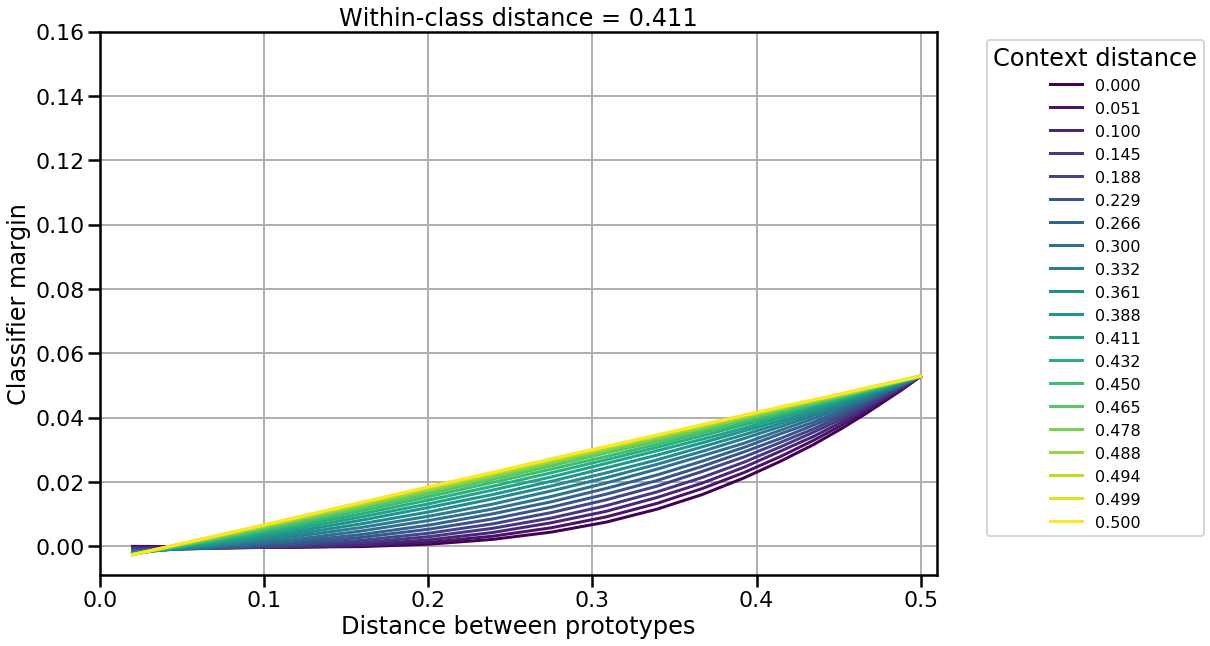

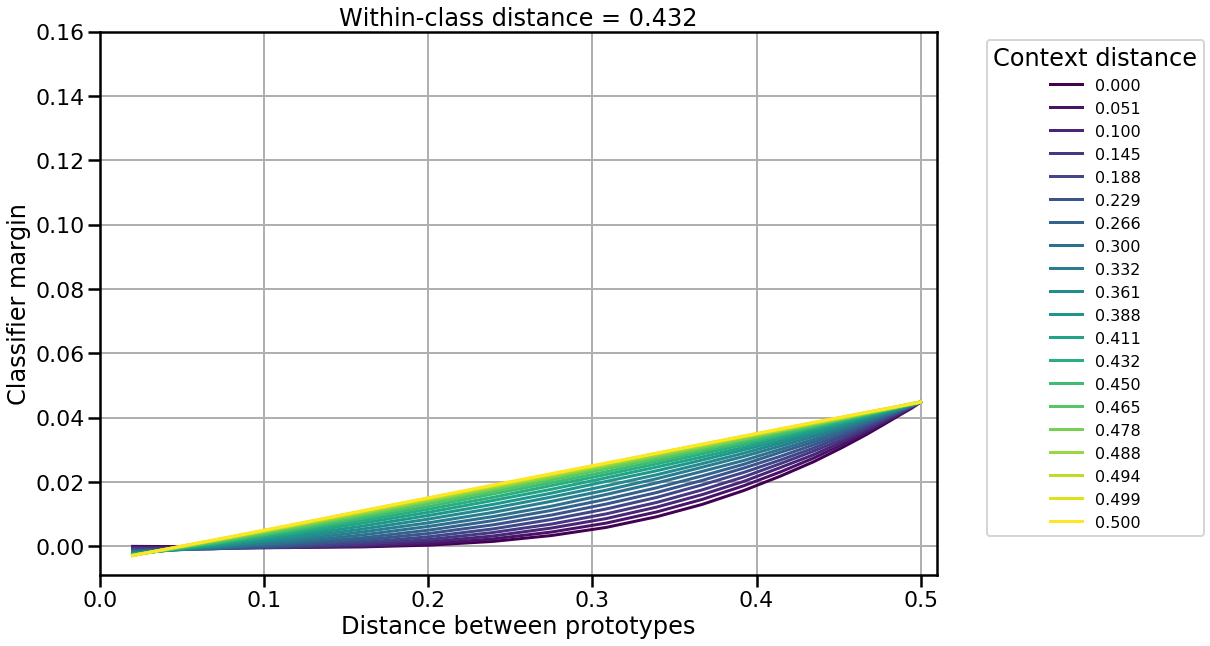

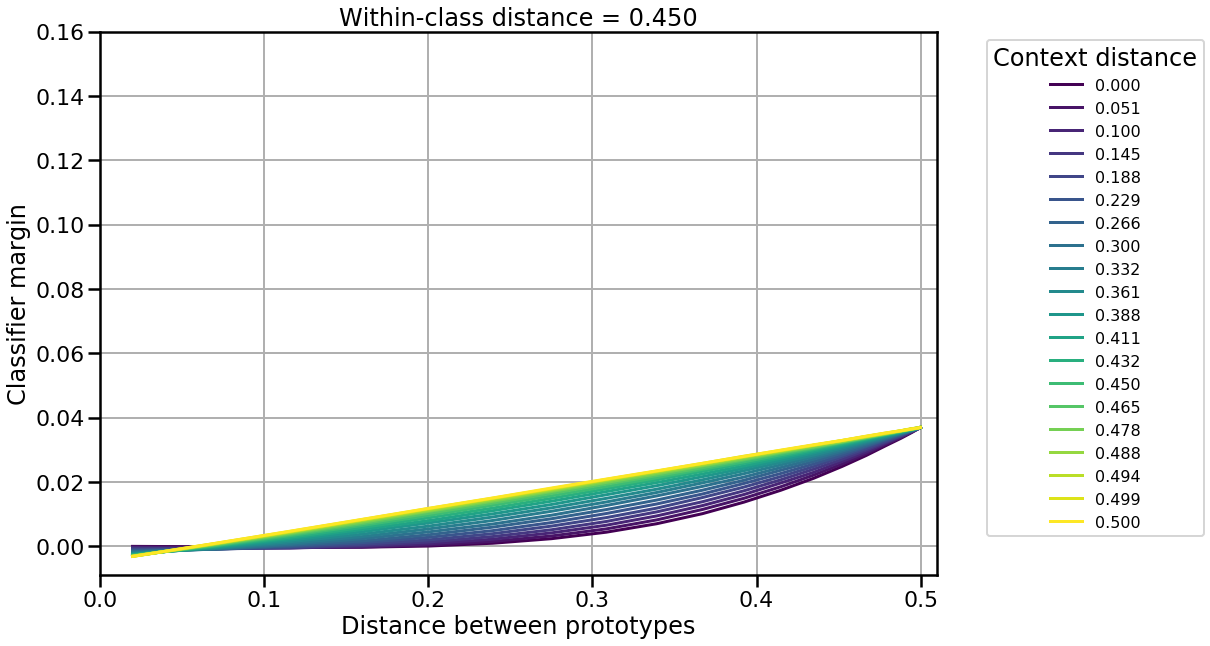

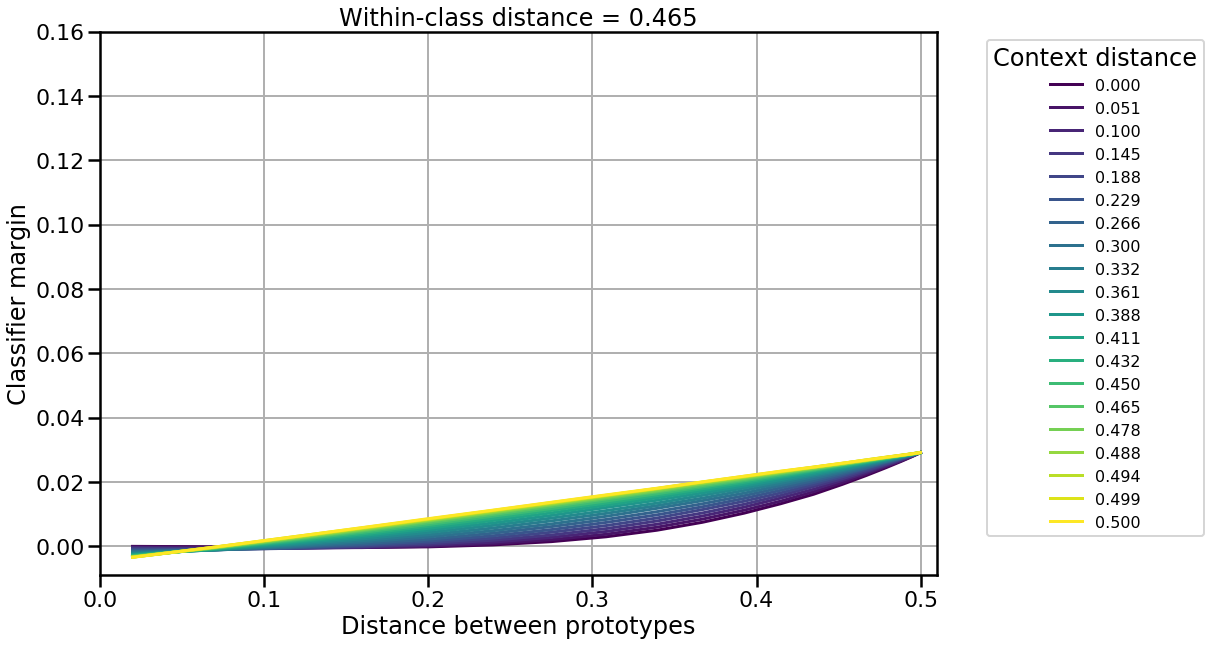

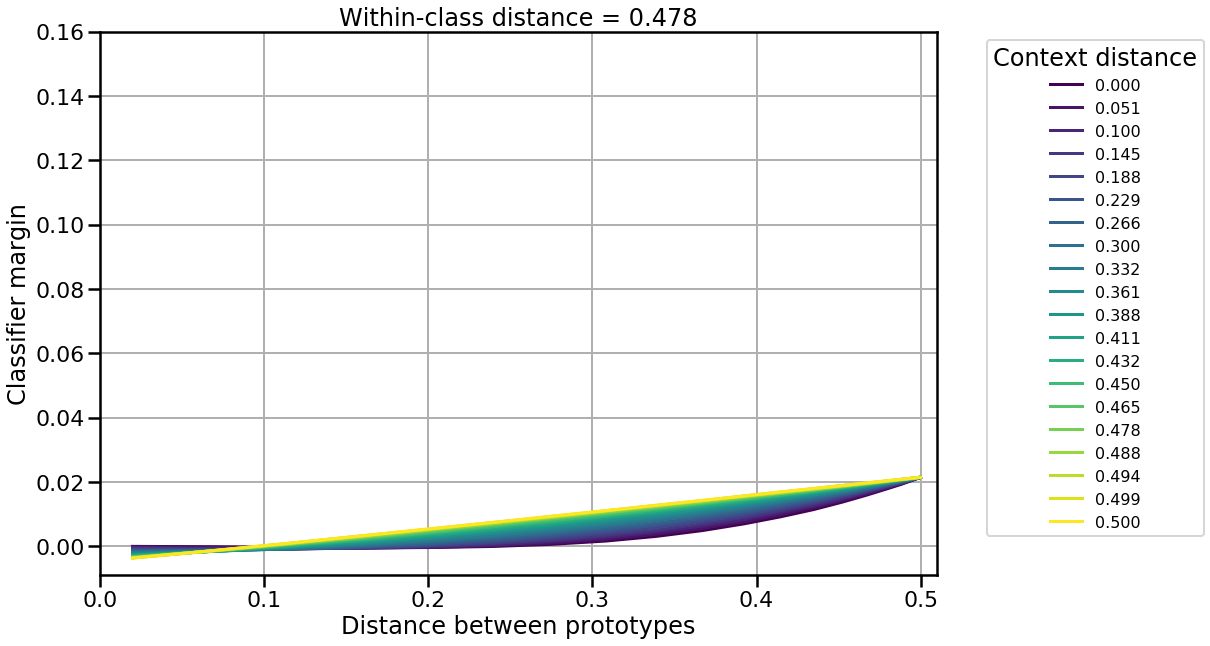

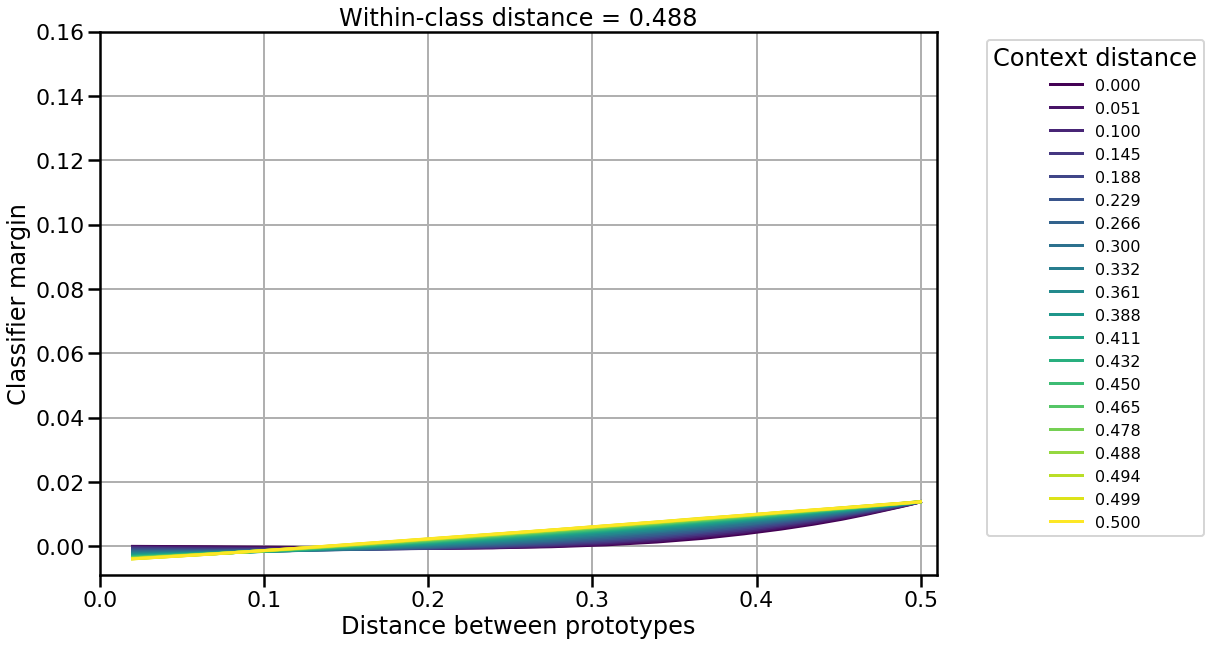

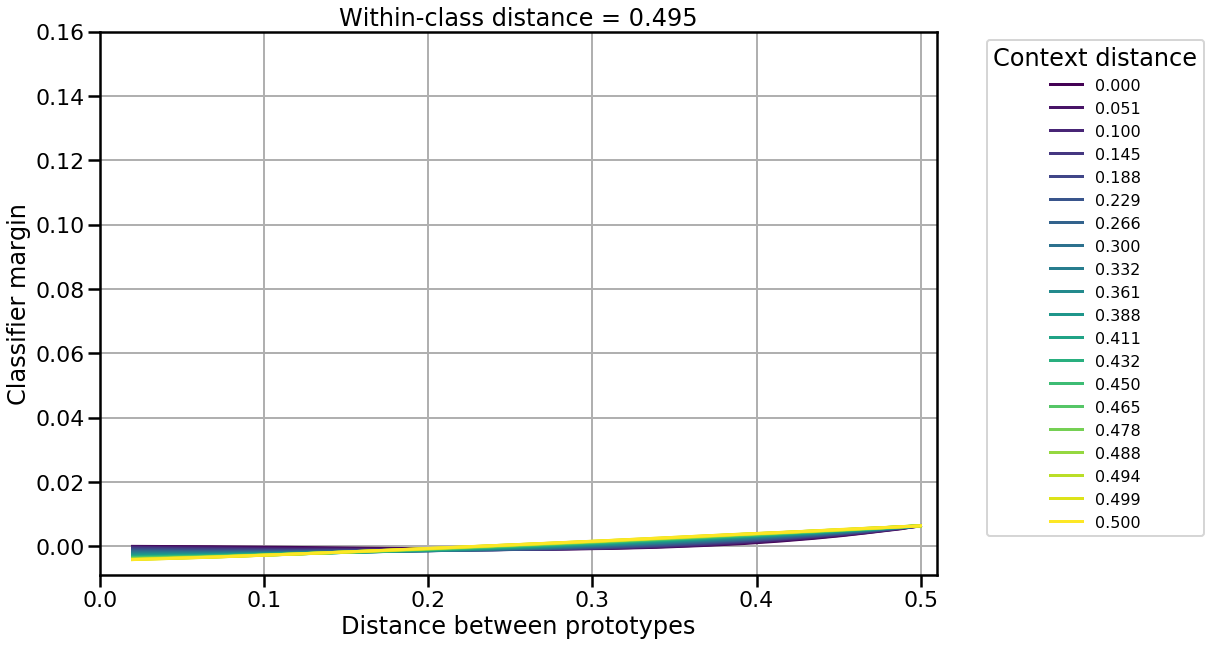

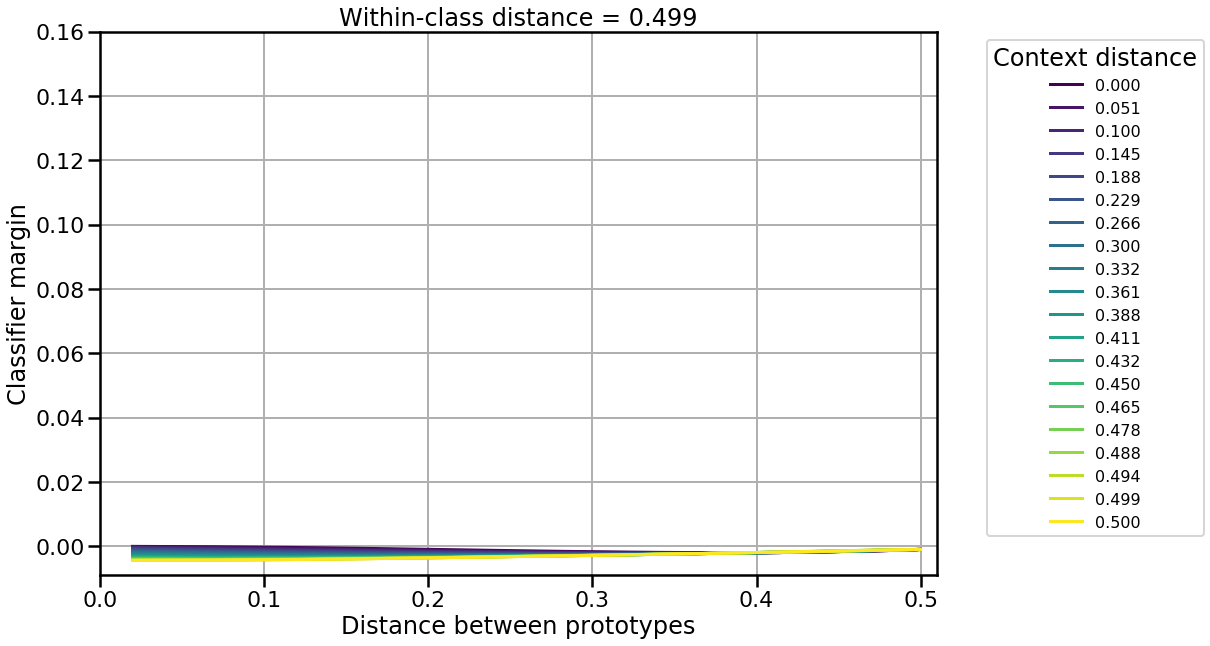

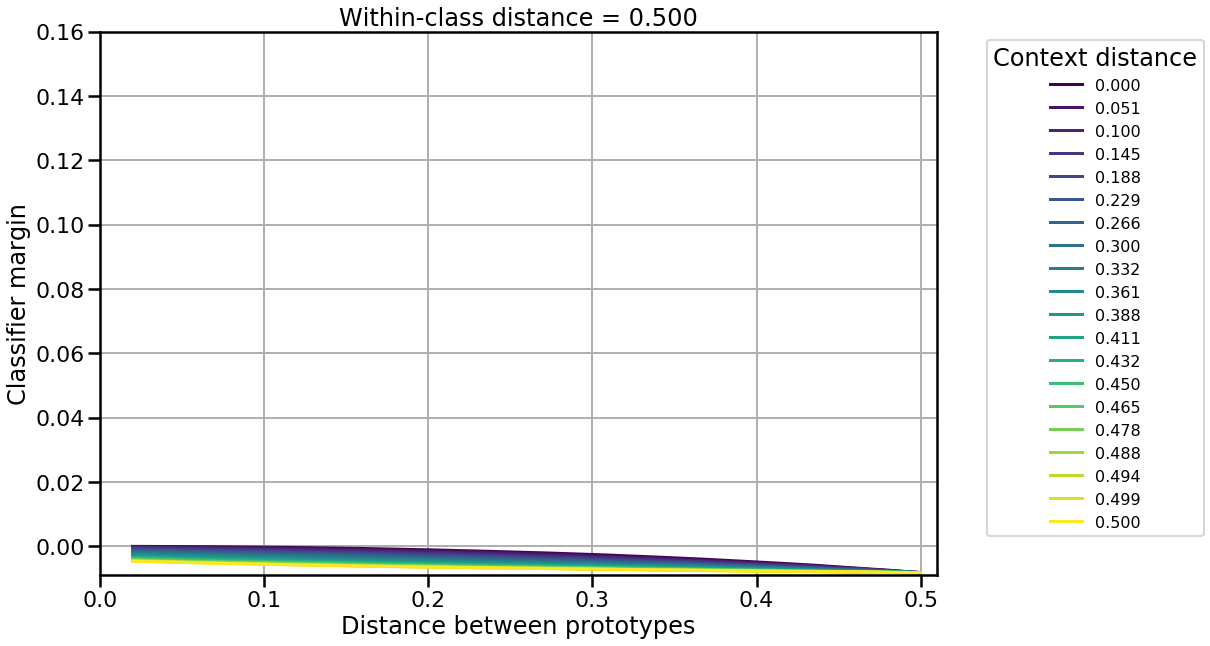

In [3]:
sns.set_context('poster')

# colors = plt.cm.plasma(np.linspace(0,1,len(out['contextDistances'])))
# colors = plt.cm.jet(np.linspace(0,1,len(out['contextDistances'])))
colors = plt.cm.viridis(np.linspace(0,1,len(out['contextDistances'])))

for k in range(len(out['exampleDistances'])):
    f,ax = plt.subplots(figsize=(15,10))
    for i in range(len(out['contextDistances'])):
        ax.plot(out['prototypeDistances'],out['marginOut'][:,i,k],color=colors[i])
    ax.grid(True)
    ax.set_ylim((-0.009, 0.16))
    ax.set_xlim((0,0.51))
    ax.legend(['%.3f' % c for c in out['contextDistances']],bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16, title='Context distance')
    ax.set_xlabel('Distance between prototypes')
    ax.set_ylabel('Classifier margin')
    ax.set_title('Within-class distance = %.3f' % out['exampleDistances'][k])